# 3.Rangerings problematik


##3.4 Værdier


### 3.4.1 Angiv udvælgelseskriterier

**Trin 1 & 2 **

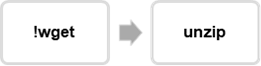

Vi anvender funksjonen, og unzip til at hente og udpakke bibliotek


In [ ]:
#@title hent bibliotekt
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64

**Trin 3 & 4**

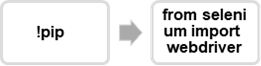


Derefter installere vi selenium og importere bibliotekket

In [ ]:
#@title installere chromium, driver, og selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 163 kB in 2s (76.4 kB/s)
Reading

In [ ]:
#@title initialisere webscrapper
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome('chromedriver',options=options)
browser.get("https://enhver.no/priser/")
#print(browser.page_source)  # results

### 3.4.2 Vælg tabeller / filer af interesse

**Trin 5**

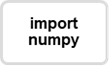

Importere bibliotekket numpy, som har lit matematik funktionalitet

```
import numpy as np
```


**Trin 6**

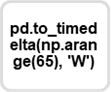

Genere et array, som representere uker

```
df=date - pd.to_timedelta(np.arange(65), 'W')
```

**Trin 7**

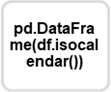

Genere kalendar data
```
datetimerange=pd.DataFrame(df.isocalendar())
```

**Trin 8**

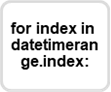

Bruk en for loop til at hente variablerne

```
for index in datetimerange.index:
```


**Trin 9**

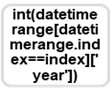

Velg variablene år og uke


```
  year_i=int(datetimerange[datetimerange.index==index]['year'])
  week_i=int(datetimerange[datetimerange.index==index]['week'])
```

**Trin 10**

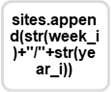

Forberede en string med uke og år, så web addresserne kan identificeres

```
sites.append(str(week_i)+"/"+str(year_i))
```



In [ ]:
#@title forberede serier med uker og år 
import pandas as pd
import numpy as np
from datetime import date
today = date.today()
date = pd.to_datetime(today)
df=date - pd.to_timedelta(np.arange(65), 'W')
datetimerange=pd.DataFrame(df.isocalendar())
sites=[]
for index in datetimerange.index:
  year_i=int(datetimerange[datetimerange.index==index]['year'])
  week_i=int(datetimerange[datetimerange.index==index]['week'])
  sites.append(str(week_i)+"/"+str(year_i))
sites

['7/2021',
 '6/2021',
 '5/2021',
 '4/2021',
 '3/2021',
 '2/2021',
 '1/2021',
 '53/2020',
 '52/2020',
 '51/2020',
 '50/2020',
 '49/2020',
 '48/2020',
 '47/2020',
 '46/2020',
 '45/2020',
 '44/2020',
 '43/2020',
 '42/2020',
 '41/2020',
 '40/2020',
 '39/2020',
 '38/2020',
 '37/2020',
 '36/2020',
 '35/2020',
 '34/2020',
 '33/2020',
 '32/2020',
 '31/2020',
 '30/2020',
 '29/2020',
 '28/2020',
 '27/2020',
 '26/2020',
 '25/2020',
 '24/2020',
 '23/2020',
 '22/2020',
 '21/2020',
 '20/2020',
 '19/2020',
 '18/2020',
 '17/2020',
 '16/2020',
 '15/2020',
 '14/2020',
 '13/2020',
 '12/2020',
 '11/2020',
 '10/2020',
 '9/2020',
 '8/2020',
 '7/2020',
 '6/2020',
 '5/2020',
 '4/2020',
 '3/2020',
 '2/2020',
 '1/2020',
 '52/2019',
 '51/2019',
 '50/2019',
 '49/2019',
 '48/2019']

In [ ]:
#@title hent data for produkter for x antal uker (de 10 første)
import time
pris_database=pd.DataFrame()
database=pd.DataFrame()
datarow=[]
datarows_1=[]
datarows_2=[]
datarows_3=[]
for i, uke in enumerate(sites[0:10]): # #List over originale kommunenavne 
  print(uke)
  #Konvertering til web-format

  browser.get("https://enhver.no/priser/"+uke) 
  try:
    data=browser.find_element_by_xpath("/html/body/div[1]/div[1]/div/div[2]/div/div/div").text
    for i, value in enumerate(data.split('\n')):
        if (i+1)%3==0:
          datarow=list(value.split(" "))
          datarow={'Kiwi': datarow[0],'Meny': datarow[1],'Obs': datarow[2],'Rema 1000': datarow[3],'Spar': datarow[4],'Extra': datarow[5]}
          datarows_1.append(datarow)
        if i%3==0:
          datarow={'Produkter': value}
          datarows_2.append(datarow)
        if (i-1)%3==0:
          datarow={'enhed': value, "tid": uke, "ugenr": uke.split("/")[0], "år": uke.split("/")[1]}


          datarows_3.append(datarow)
  except:
    print("none")
  time.sleep(3)
database=pd.concat([pd.DataFrame(datarows_2),pd.DataFrame(datarows_3),pd.DataFrame(datarows_1)], axis=1)

7/2021
6/2021
5/2021
4/2021
3/2021
2/2021
1/2021
53/2020
52/2020
51/2020


### 3.4.3 Vælg data i en tabel / fil


In [ ]:
#@title formater tidsserie, som dato
database=database.dropna()
database['dato']=pd.to_datetime(database.ugenr.astype(str)+
                           database.år.astype(str).add('-1') ,format='%V%G-%u')

Se database

In [ ]:
database

,Produkter,enhed,tid,ugenr,år,Kiwi,Meny,Obs,Rema 1000,Spar,Extra,dato
0,Brokkoli,1 stk,7/2021,7,2021,12.80,12.90,17.90,13.90,12.90,12.80,2021-02-15
1,Blomkål,1 stk,7/2021,7,2021,18.80,21.80,22.90,19.80,21.90,18.90,2021-02-15
2,Oyster Sauce,2 dl,7/2021,7,2021,32.40,34.50,20.10,32.40,33.90,32.40,2021-02-15
3,Woksaus Sweet and sour,120 gr,7/2021,7,2021,18.30,20.00,11.76,18.30,19.90,18.30,2021-02-15
4,Norvegia,1 kg,7/2021,7,2021,109.00,117.00,114.90,109.00,112.00,109.00,2021-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...
433,Hvetemel,180 gram,51/2020,51,2020,32.90,41.50,36.90,32.90,39.90,32.90,2020-12-14
434,Mr.Lee Nudler m/kjøtt kopp,100gr,51/2020,51,2020,14.90,14.90,16.50,14.90,19.90,14.90,2020-12-14
435,"Svisker, eget merke",47gr,51/2020,51,2020,9.40,11.80,11.10,9.90,12.90,9.90,2020-12-14
436,Nescafé Gull refill,43 gr,51/2020,51,2020,15.90,17.50,16.90,15.90,17.50,15.90,2020-12-14


Vis database over produktpriser over tid

Med prinsippet:
```
alt.Chart(database).transform_fold(list(['Kiwi','Meny','Obs','Rema 1000','Spar','Extra'])).mark_line().encode(
    x='dato:O',
    y='value:Q',
    color='Produkter:N',
)
```



In [ ]:
#@title vis database av produkter
alt.Chart(database).transform_fold(list(['Kiwi','Meny','Obs','Rema 1000','Spar','Extra'])).mark_line().encode(
    x='dato:O',
    y='value:Q',
    color='Produkter:N',

).properties(width=600)

alt.Chart(...)

Hvordan kan vi skape verdi med datasettet? og for hvilken målgruppe?